## データ準備

In [70]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = sns.load_dataset('tips')

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
df['tip_rate'] = df['tip'] / df['total_bill']

In [11]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [12]:
#もうちょっと俯瞰してデータがどうなのか見たい
# →ヒストグラム、棒グラフ

## 分布の描画

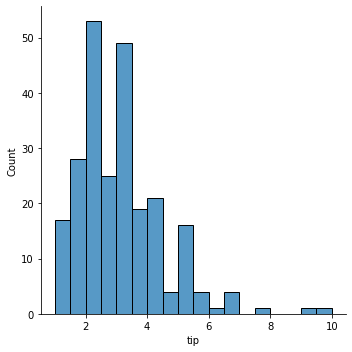

In [17]:
sns.displot(df['tip'],kde=False)

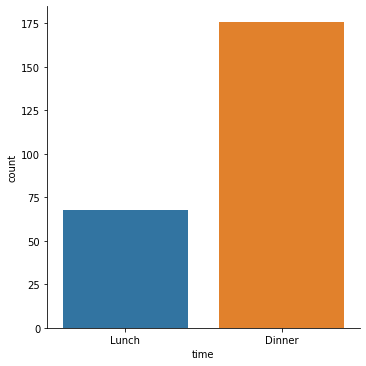

In [18]:
sns.catplot(x='time',data=df, kind='count')

## 平均値

In [23]:
np.mean(df['tip_rate'])

0.16080258172250478

In [24]:
df['tip_rate'].mean()

0.16080258172250478

In [30]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

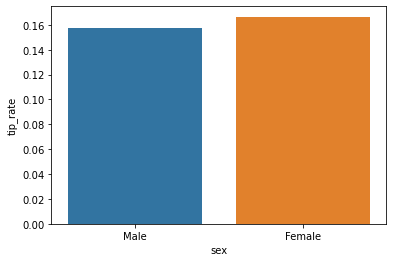

In [28]:
sns.barplot(x='sex',y='tip_rate',data=df,ci=None)

## 中央値

In [34]:
np.median(df['tip_rate'])

0.15476977125802577

In [33]:
df['tip_rate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64

In [35]:
#中央値と平均値の値が違う
#　→外れ値が原因

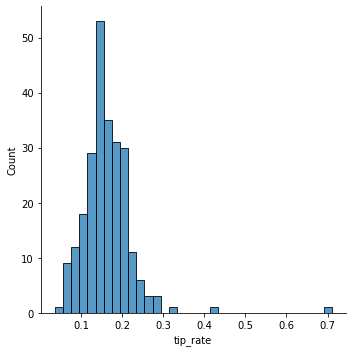

In [37]:
sns.displot(df['tip_rate'],kde=False)

In [38]:
df['tip_rate'].median()

0.15476977125802577

In [39]:
df['tip_rate'].mean()

0.16080258172250478

In [40]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

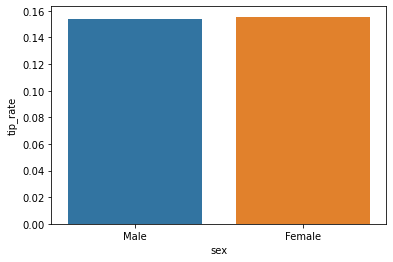

In [42]:
sns.barplot(x='sex',y='tip_rate',data=df,estimator=np.median,ci=None)

In [44]:
df.sort_values('tip_rate',ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [50]:
mode,count=stats.mode(df)

In [53]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [54]:
df['size'].mode()

0    2
dtype: int64

## 範囲

In [55]:
np.min(df['tip'])

1.0

In [56]:
df['tip'].min()

1.0

In [57]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [58]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

データを並べて4分割した時の25%,50%,75%  外れ値に強い

Q_3 - Q_1:四分位範囲(IQR)

(Q_3 - Q_1)/2 : 四分位偏差(QD)

In [62]:
np.quantile(df['tip_rate'],[0.25,0.5,0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [64]:
df['tip_rate'].quantile([0.25,0.5,0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [65]:
stats.iqr(df['tip_rate'])  ##iqr

0.06234812458689151

In [66]:
stats.iqr(df['tip_rate'])/2.  ##idr

0.031174062293445756

### 箱ひげ図

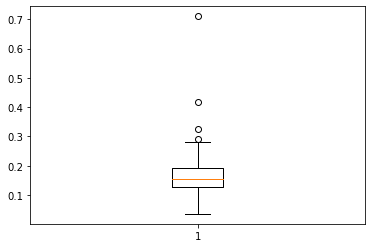

In [72]:
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

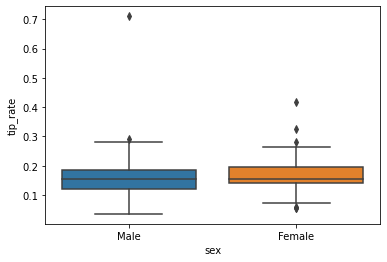

In [75]:
sns.boxplot(x='sex',y='tip_rate',data=df)

## 平均偏差
　・平均(もしくは中央値)からの偏差の絶対値の平均

　・絶対値が扱いにくい

### →絶対値は扱いにくいので二乗する

## 分散(variance)

・平均からの偏差の**2乗**の平均

・通常標本の分散はs<sup>2</sup>、母集団の分散はσ<sup>2</sup>で表す



### 　→二乗すると尺度がズレるので平方根をとる



## 標準偏差(standard deviation)

・平均からの偏差の2乗の平均**の平方根**(**分散の平方根**)

・通常標本の標準偏差はs,母集団の標準偏差はσで表す



## 分散と標準偏差

<u>分散を求める</u>

・np.var()

<u>標準偏差を求める</u>

・np.std()


## 分散

In [79]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [78]:
np.std(df['tip'])

1.3807999538298958

## 共分散(covariance)

・2変数間の記述統計

$$
s_{xy} = \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})
$$


## 共分散行列(covariance matrix)

・複数の変数間の分散と共分散を行列にしたもの

・変数が多くなると行列で捉えた方が便利

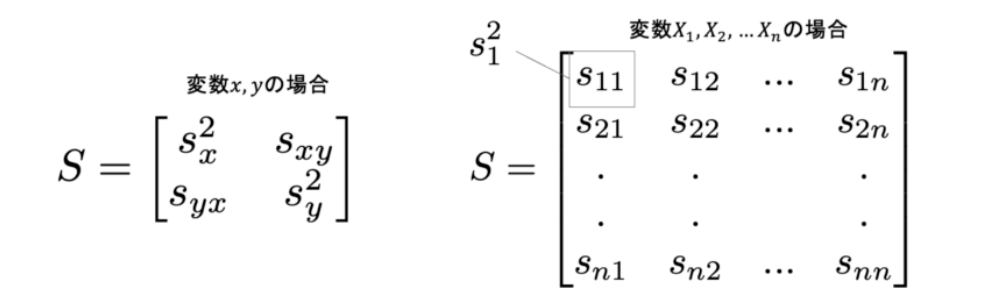

## 共分散

In [82]:
np.cov(df['total_bill'],df['tip'],bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [87]:
x = np.stack([df['total_bill'],df['tip'],df['size']],axis=0)
np.cov(x,bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

**尺度が違うので**必ずしも相関を比べることはできない！

### →標準化する必要がある(**相関係数**)

## 相関係数

・共分散を標準化したのが相関係数

・共分散の取りうる値（最小値〜最大値）を計算し、-1~1の範囲にすることを考える

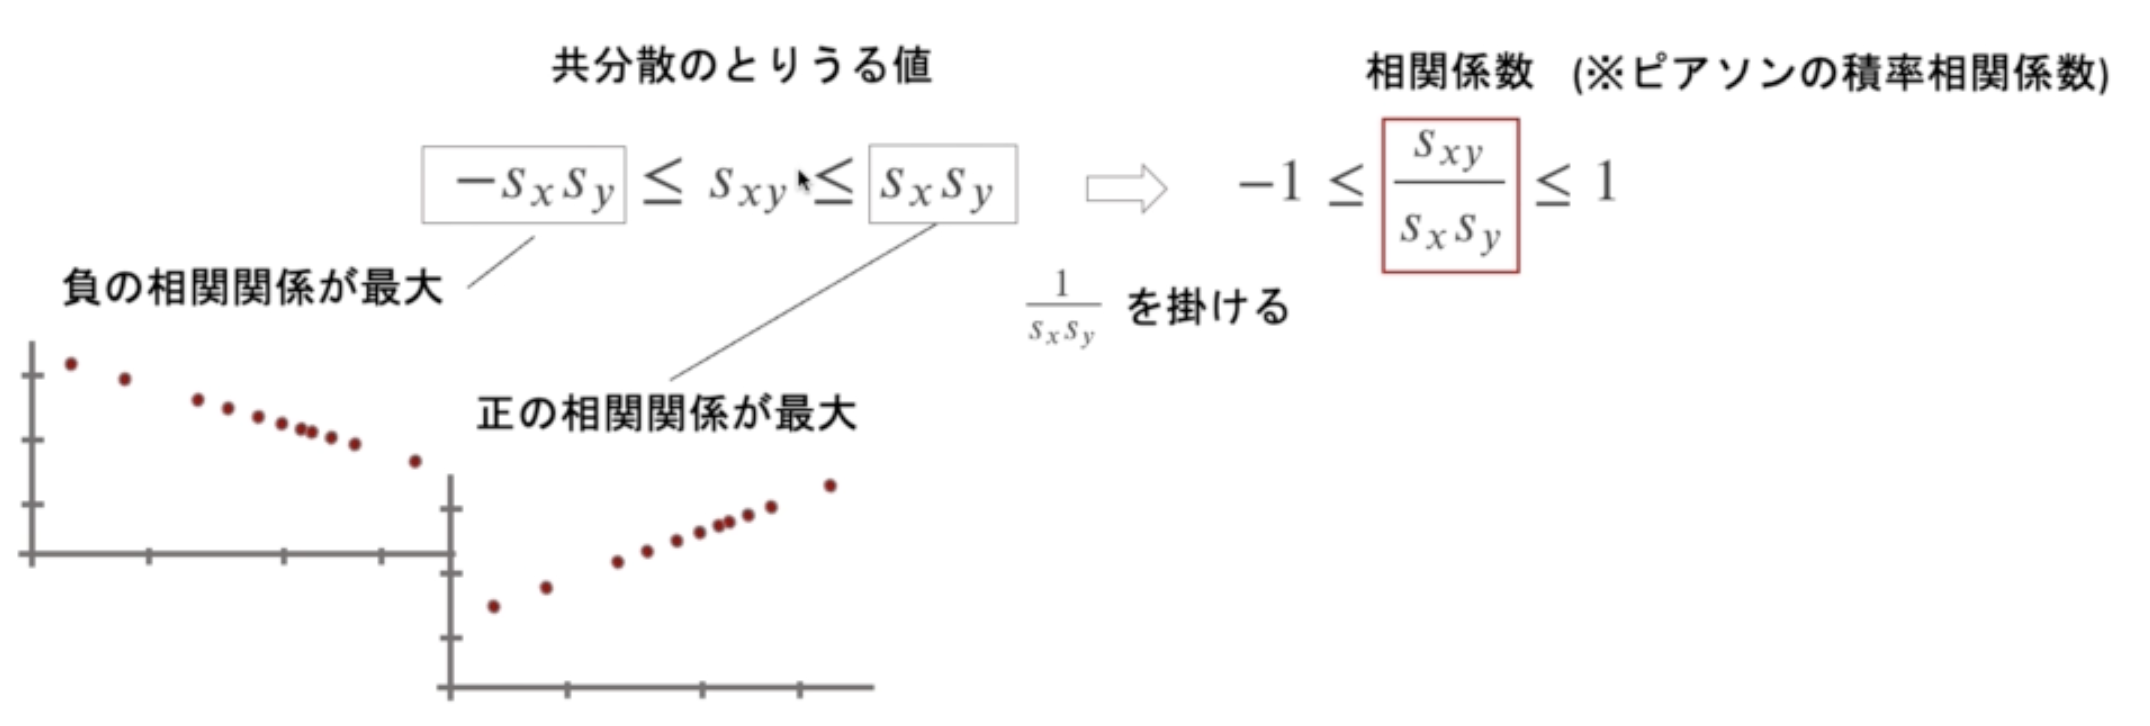

## 相関行列

・複数の変数間の相関係数を行列にしたもの

・対角要素は1になる

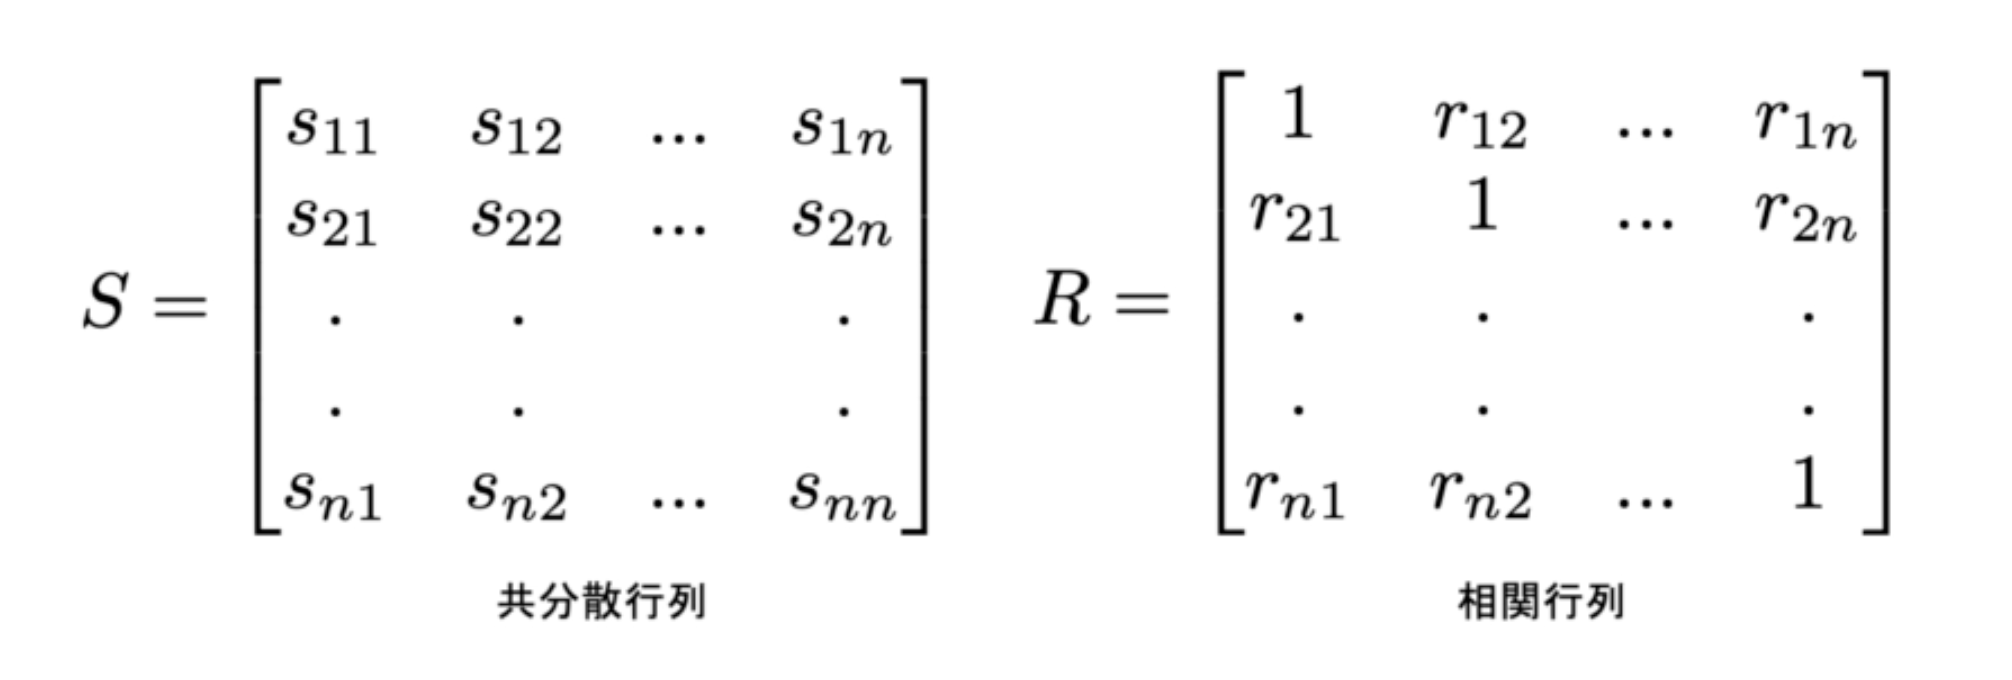




## 相関係数(correlation coefficient)

<u>相関係数を求める</u>

 ・np.corrcoef(xarray,yarray)

 ・np.corrcoef(array)
 
 ・df.corr()

<u>相関行列を描画する</u>

 ・sns.heatmap(df.corr())

In [88]:
np.corrcoef(df['total_bill'],df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [89]:
x = np.stack([df['total_bill'],df['tip'],df['size']],axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

| Pair             | Value  |
|------------------|--------|
| total_bill - tip | 0.6757 |
| total_bill - size| 0.5983 |
| tip - size       | 0.4893 |


In [90]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

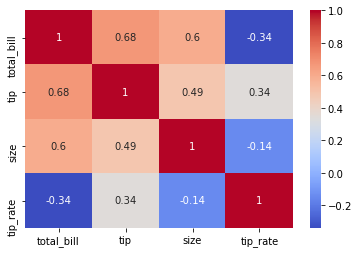

In [92]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)